In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
def mnk(data_x, data_y, g=0):
    #Взято с: 
    #https://npm.mipt.ru/books/lab-intro/main.pdf

    # s = np.array([[int(s1[i]), int(s1[i + 1])]for i in range(0, len(s1), 2)])
    s = np.array([[data_x[i], data_y[i]] for i in range(len(data_x))])
    sum_x = np.sum([i[0] for i in s])
    sum_y = np.sum([i[1] for i in s])
    sum_xy = np.sum([i[0] * i[1] for i in s])
    sum_xx = np.sum([i[0] * i[0] for i in s])

    a = ((len(s) * sum_xy) - (sum_x * sum_y)) / ((len(s) * sum_xx) - sum_x ** 2)# коэфициэент при x
    b = (sum_y - (a * sum_x)) / len(s)# свободный член


    y_mean = np.mean(sum_y)
    x_mean = np.mean(sum_x)
    D_yy = np.mean((data_y - y_mean) ** 2)
    D_xx = np.mean((data_x - x_mean) ** 2)
    # print(D_xx, D_yy, a)

    if g == 1:
        ga = ((1 / (len(s) - 2)) * (np.abs((D_yy / D_xx) - (a ** 2)))) ** (1/2)# погрешности для коэфициэнтов прямой построенной с помощью МНК
        gb = ga * ((np.mean(data_x ** 2)) ** (1 / 2))
        # print(ga, gb)
        return a, b, ga, gb
    else:
        return a, b

In [8]:
data = pd.read_csv('iris_data.csv')
data_x1 = np.array(data['SepalLengthCm'])
data_y1 = np.array(data['SepalWidthCm'])
data_x2 = np.array(data['PetalLengthCm'])
data_y2 = np.array(data['PetalWidthCm'])

data_newx1 = [np.min(data_x1), np.max(data_x1)]
data_newx2 = [np.min(data_x2), np.max(data_x2)]
a, b = mnk(data_x1, data_y1)
data_newy1 = [i*a + b for i in data_newx1]
a, b = mnk(data_x2, data_y2)
data_newy2 = [i*a + b for i in data_newx2]

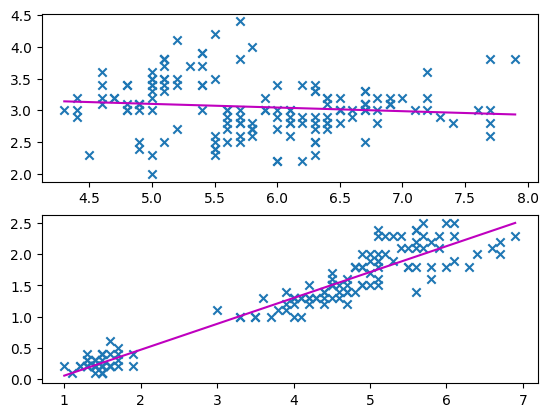

In [12]:
ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2, 1), (1, 0))
ax1.scatter(data_x1, data_y1, marker='x')
ax2.scatter(data_x2, data_y2, marker='x')
ax1.plot(data_newx1, data_newy1, 'm')
ax2.plot(data_newx2, data_newy2, 'm')